<a href="https://colab.research.google.com/github/AhmedSAad8/Calling-Api-/blob/main/gender_agepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import PIL
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

In [ ]:
root_dir = "/kaggle/input/utkface-new/UTKFace"

In [ ]:
path_arr = []
age_arr = []
gender_arr = []

for file in tqdm(os.listdir(root_dir)):
    labels = file.split("_")

    filepath = os.path.join(root_dir, file)
    age = int(labels[0])
    gender = int(labels[1])

    path_arr.append(filepath)
    age_arr.append(age)
    gender_arr.append(gender)

100%|██████████| 23708/23708 [00:00<00:00, 467062.59it/s]


In [ ]:
df = pd.DataFrame({
    "image_path": path_arr,
    "age": age_arr,
    "gender": gender_arr
})
df.head()

,image_path,age,gender
0,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...,26,0
1,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...,22,1
2,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...,21,1
3,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...,28,0
4,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...,17,1


In [ ]:
df_train, df_valid, df_test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print("Total Size:", df.shape[0])
print("Train Size:", df_train.shape[0])
print("valid Size:", df_valid.shape[0])
print("Test Size:", df_test.shape[0])

Total Size: 23708
Train Size: 14224
valid Size: 4742
Test Size: 4742


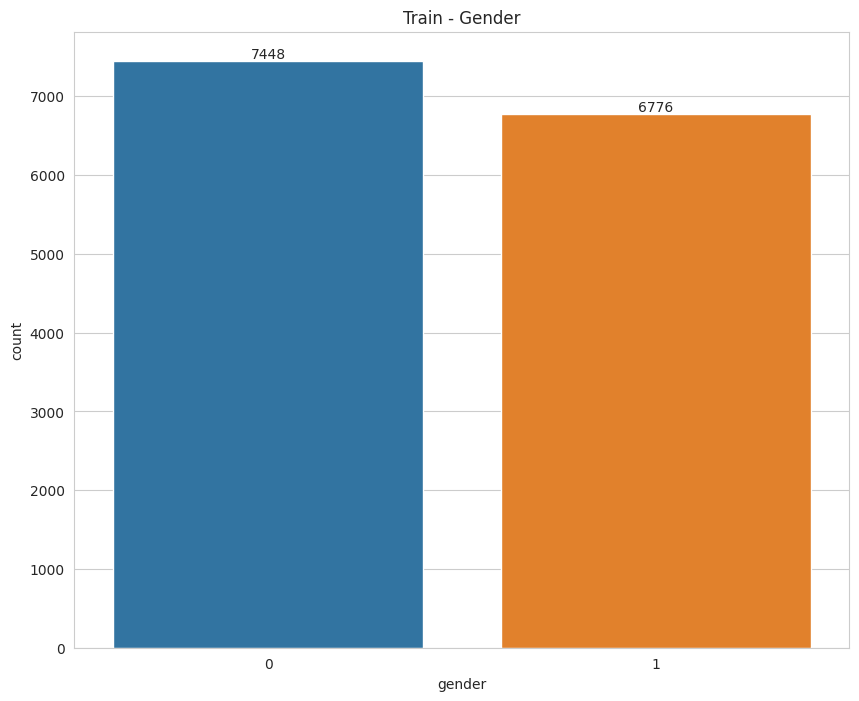

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_train["gender"].value_counts().index, data=df_train)
ax.set_title("Train - Gender")
for container in ax.containers:
    ax.bar_label(container)

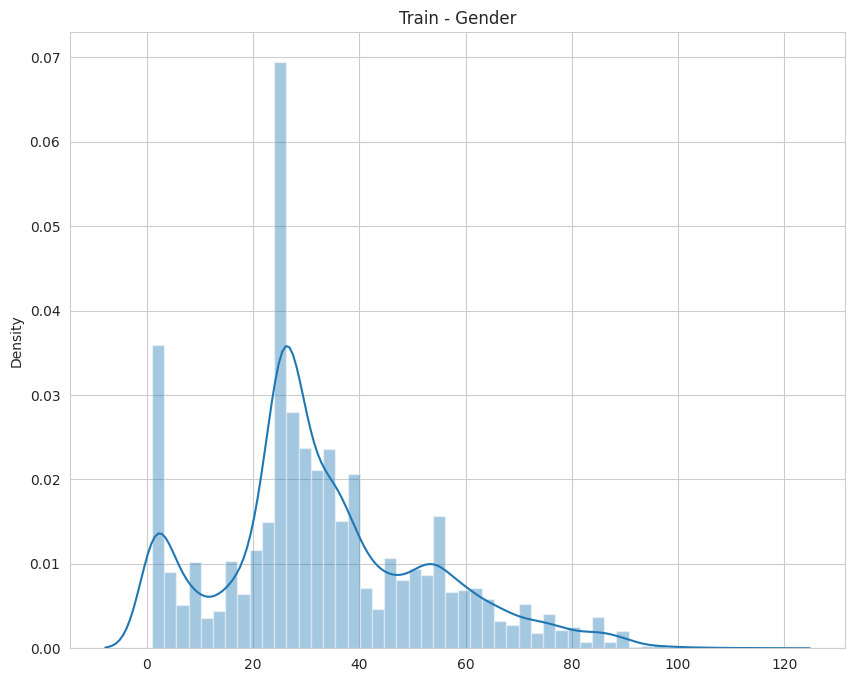

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_train["age"])
ax.set_title("Train - Gender")
plt.show()

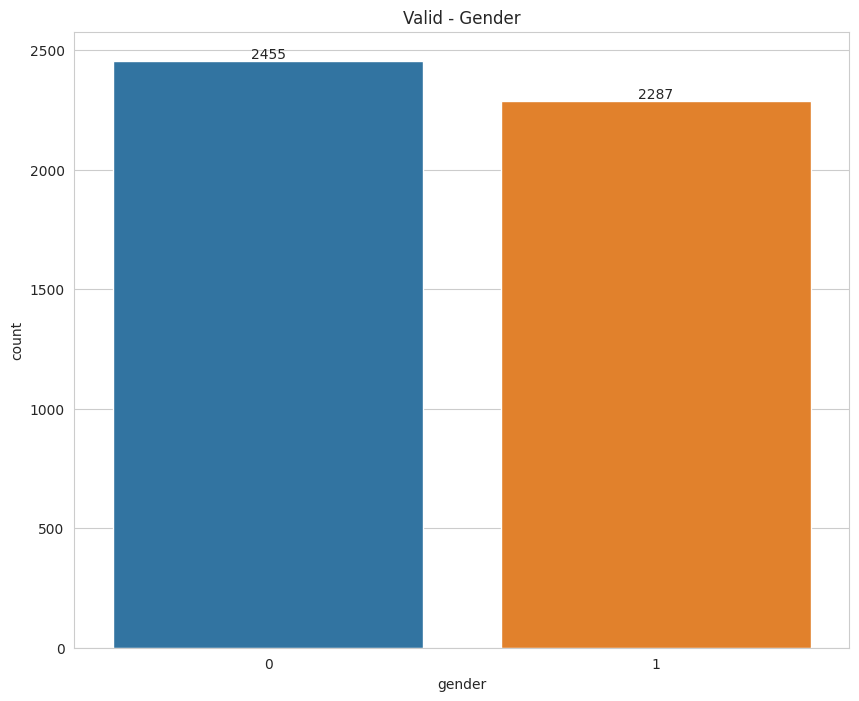

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_valid["gender"].value_counts().index, data=df_valid)
ax.set_title("Valid - Gender")
for container in ax.containers:
    ax.bar_label(container)

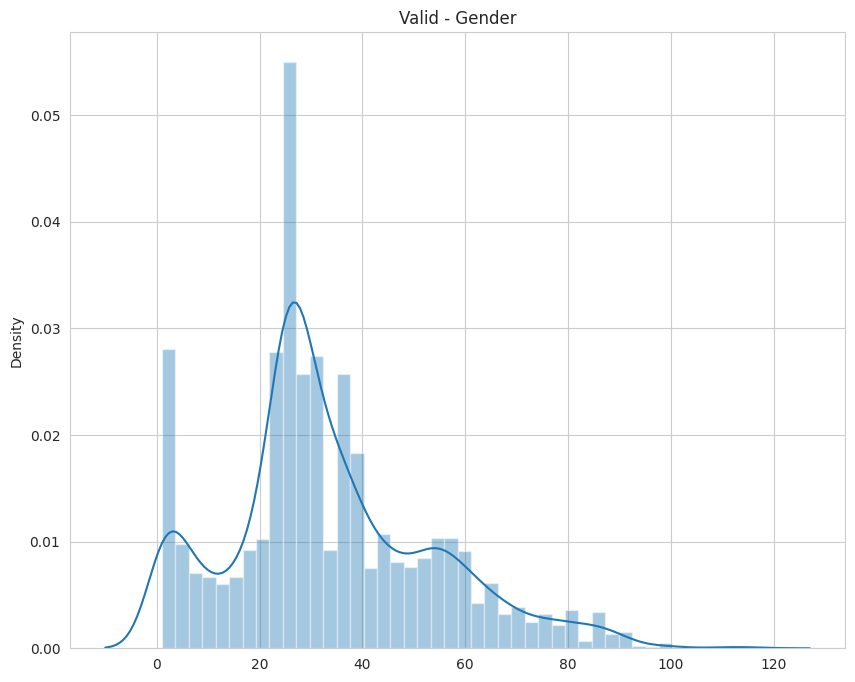

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_valid["age"])
ax.set_title("Valid - Gender")
plt.show()

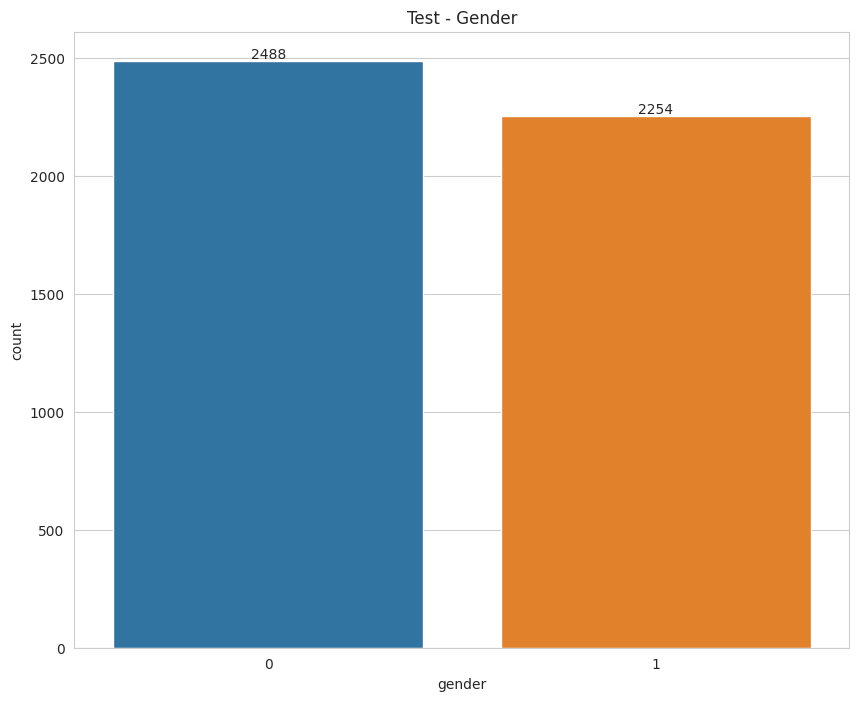

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="gender", order=df_test["gender"].value_counts().index, data=df_test)
ax.set_title("Test - Gender")
for container in ax.containers:
    ax.bar_label(container)

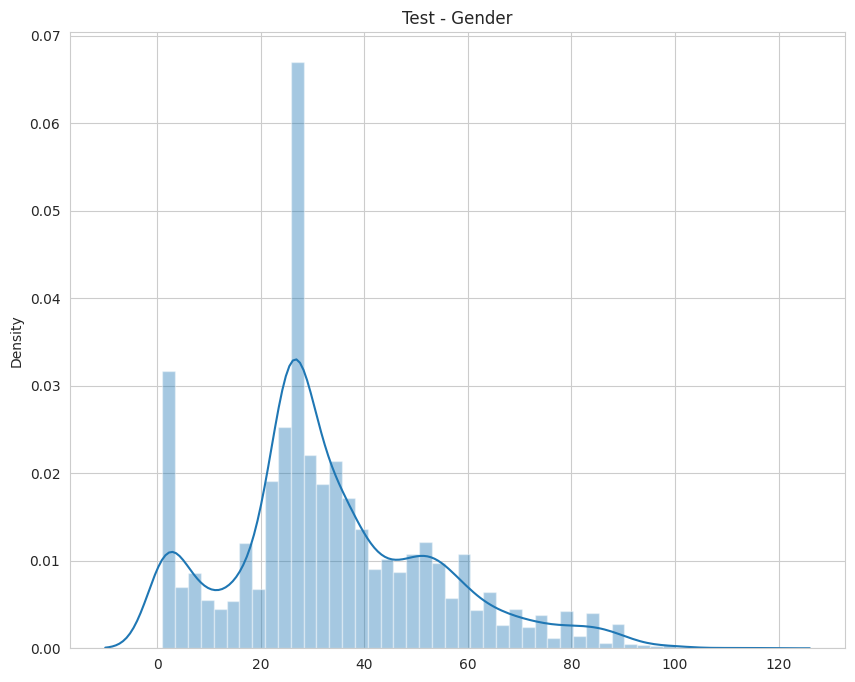

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(x=df_test["age"])
ax.set_title("Test - Gender")
plt.show()

In [ ]:
def visualize_df(df: np.ndarray):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            a = np.random.randint(1, len(df), 1)[0]
            img_path = df.loc[a][['image_path']].values[0]
            img_age = df.loc[a][['age']].values[0]
            img_gender = df.loc[a][['gender']].values[0]

            image = Image.open(img_path).convert('RGB')

            ax.imshow(image)
            ax.set_title(f"Age: {img_age}\nGender: {img_gender}")
            ax.axis('off')

        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

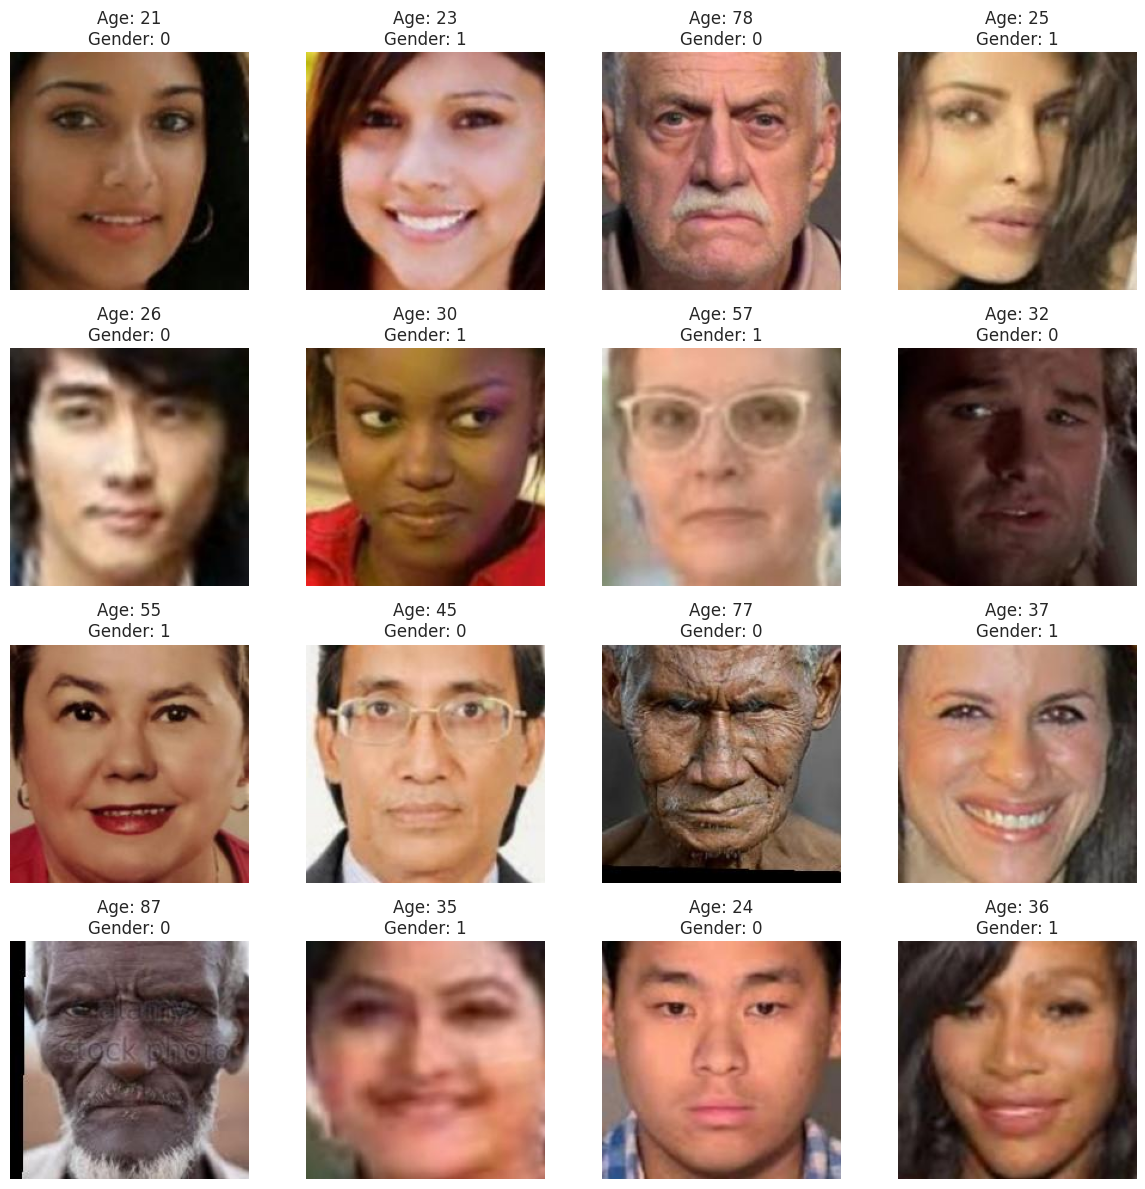

In [ ]:
visualize_df(df_train)

In [ ]:
train_img_arr = []
train_gender_arr = []
train_age_arr = []

for idx, row in tqdm(df_train.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    train_img_arr.append(img)
    train_gender_arr.append(row['gender'])
    train_age_arr.append(row['age'])

train_img_arr = np.array(train_img_arr).reshape(len(train_img_arr), 128, 128, 1)
train_gender_arr = np.array(train_gender_arr)
train_age_arr = np.array(train_age_arr)

14224it [01:49, 129.56it/s]


In [ ]:
valid_img_arr = []
valid_gender_arr = []
valid_age_arr = []

for idx, row in tqdm(df_valid.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    valid_img_arr.append(img)
    valid_gender_arr.append(row['gender'])
    valid_age_arr.append(row['age'])

valid_img_arr = np.array(valid_img_arr).reshape(len(valid_img_arr), 128, 128, 1)
valid_gender_arr = np.array(valid_gender_arr)
valid_age_arr = np.array(valid_age_arr)

4742it [00:32, 144.55it/s]


In [ ]:
test_img_arr = []
test_gender_arr = []
test_age_arr = []

for idx, row in tqdm(df_test.iterrows()):
    img = load_img(row['image_path'], color_mode="grayscale")
    img = img.resize((128, 128), Image.LANCZOS)
    img = np.array(img, dtype=float)
    img /= 255.0
    test_img_arr.append(img)
    test_gender_arr.append(row['gender'])
    test_age_arr.append(row['age'])

test_img_arr = np.array(test_img_arr).reshape(len(test_img_arr), 128, 128, 1)
test_gender_arr = np.array(test_gender_arr)
test_age_arr = np.array(test_age_arr)



4742it [00:30, 155.92it/s]


In [ ]:
inputs = Input(shape=(128, 128, 1))

conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max1)
max2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max2)
max3 = MaxPooling2D(pool_size=(2, 2))(conv3)

flat = Flatten()(max3)

dense1 = Dense(128, activation='relu')(flat)
drop1 = Dropout(0.4)(dense1)
output_gender = Dense(1, activation='sigmoid')(drop1)

dense2 = Dense(256, activation='relu')(flat)
drop2 = Dropout(0.4)(dense2)
output_age = Dense(1, activation='linear')(drop2)

model = Model(inputs=[inputs], outputs=[output_gender, output_age])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam',
              metrics=['accuracy', 'mae'])

In [ ]:
 history = model.fit(x=train_img_arr, y=[train_gender_arr, train_age_arr], batch_size=32, epochs=40, validation_data=(valid_img_arr, [valid_gender_arr, valid_age_arr]))

Epoch 1/40
445/445 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - dense_1_accuracy: 0.6421 - dense_3_mae: 15.5280 - loss: 16.2004 - val_dense_1_accuracy: 0.8018 - val_dense_3_mae: 10.8606 - val_loss: 11.2990
Epoch 2/40
445/445 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - dense_1_accuracy: 0.7903 - dense_3_mae: 11.1970 - loss: 11.6407 - val_dense_1_accuracy: 0.8461 - val_dense_3_mae: 9.3797 - val_loss: 9.7212
Epoch 3/40
445/445 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - dense_1_accuracy: 0.8401 - dense_3_mae: 9.6631 - loss: 10.0316 - val_dense_1_accuracy: 0.8674 - val_dense_3_mae: 8.5447 - val_loss: 8.8481
Epoch 4/40
445/445 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - dense_1_accuracy: 0.8567 - dense_3_mae: 8.6252 - loss: 8.9489 - val_dense_1_accuracy: 0.8760 - val_dense_3_mae: 8.0207 - val_loss: 8.3053
Epoch 5/40
445/445 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - dense_1_accuracy: 0.8634 - dense_3_mae: 8.1674 - loss: 8.4722 - val_dense_1_accuracy: 0.8872 - val_dense_3_mae: 7.5505 - val_loss: 7.8053
Epoch 6/40
445/445 ━━━━

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()

,dense_1_accuracy,dense_3_mae,loss,val_dense_1_accuracy,val_dense_3_mae,val_loss
0,0.706763,13.540603,14.109880,0.801771,10.860560,11.298960
1,0.805751,10.708712,11.131426,0.846057,9.379680,9.721214
2,0.840411,9.416408,9.776108,0.867356,8.544687,8.848133
3,0.856721,8.625160,8.946442,0.876002,8.020712,8.305304
4,0.866915,8.133936,8.430819,0.887178,7.550493,7.805320


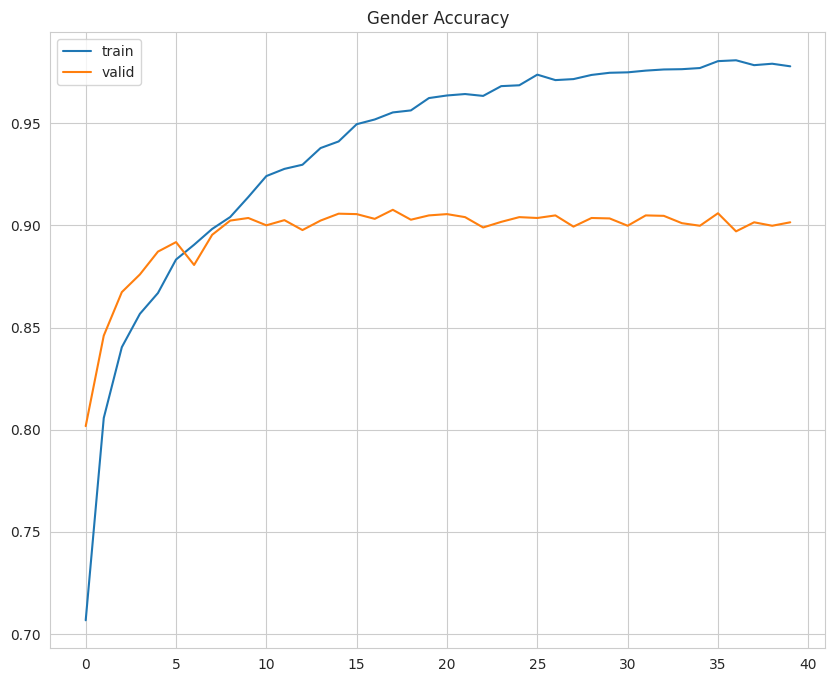

In [ ]:
plt.figure(figsize=(10, 8))

plt.title("Gender Accuracy")

plt.plot(history_df["dense_1_accuracy"])
plt.plot(history_df["val_dense_1_accuracy"])

plt.legend(["train", "valid"])

plt.show()

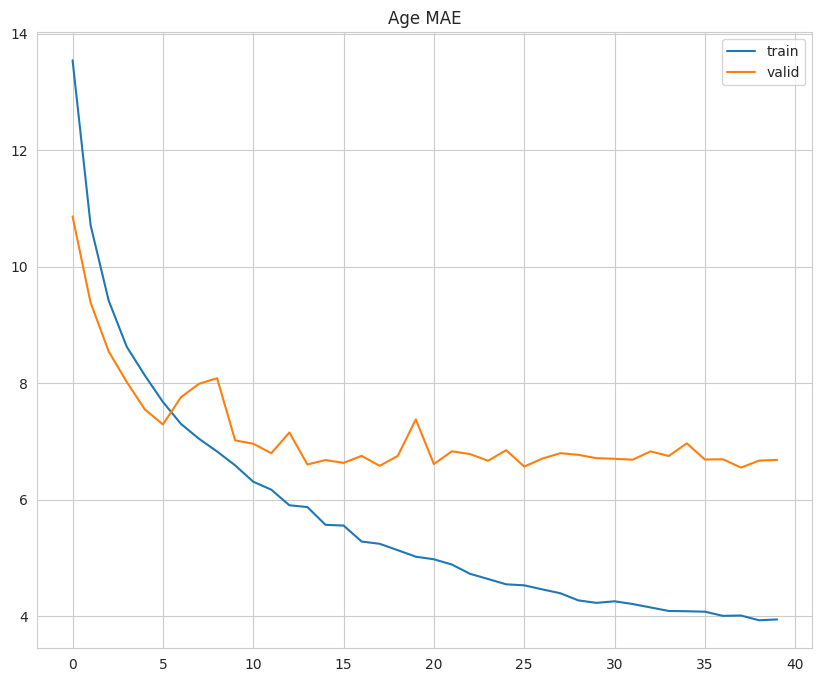

In [ ]:
plt.figure(figsize=(10, 8))

plt.title("Age MAE")

plt.plot(history_df["dense_3_mae"])
plt.plot(history_df["val_dense_3_mae"])

plt.legend(["train", "valid"])

plt.show()

In [ ]:
preds = model.predict(test_img_arr, verbose=0)
pred_gender = np.argmax(preds[0], axis=1)
pred_age = [round(pred[0]) for pred in preds[1]]

In [ ]:
df_test["pred_age"] = pred_age
df_test["pred_gender"] = pred_gender

In [ ]:
def visualize_results(df: pd.DataFrame):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            a = np.random.randint(1, len(df), 1)[0]
            gender_dict = {0: 'Male', 1: 'Female'}
            img_path = df.loc[a][['image_path']].values[0]
            img_age = df.loc[a][['age']].values[0]
            img_gender = df.loc[a][['gender']].values[0]
            img_pred_age = df.loc[a][['pred_age']].values[0]
            img_pred_gender = df.loc[a][['pred_gender']].values[0]

            image = Image.open(img_path).convert('RGB')

            ax.imshow(image)
            ax.set_title(f"Pred Age: {img_pred_age}(True:{img_age})\nPred Gender: {gender_dict[img_pred_gender]}(True:{gender_dict[img_gender]})")
            ax.axis('off')

        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

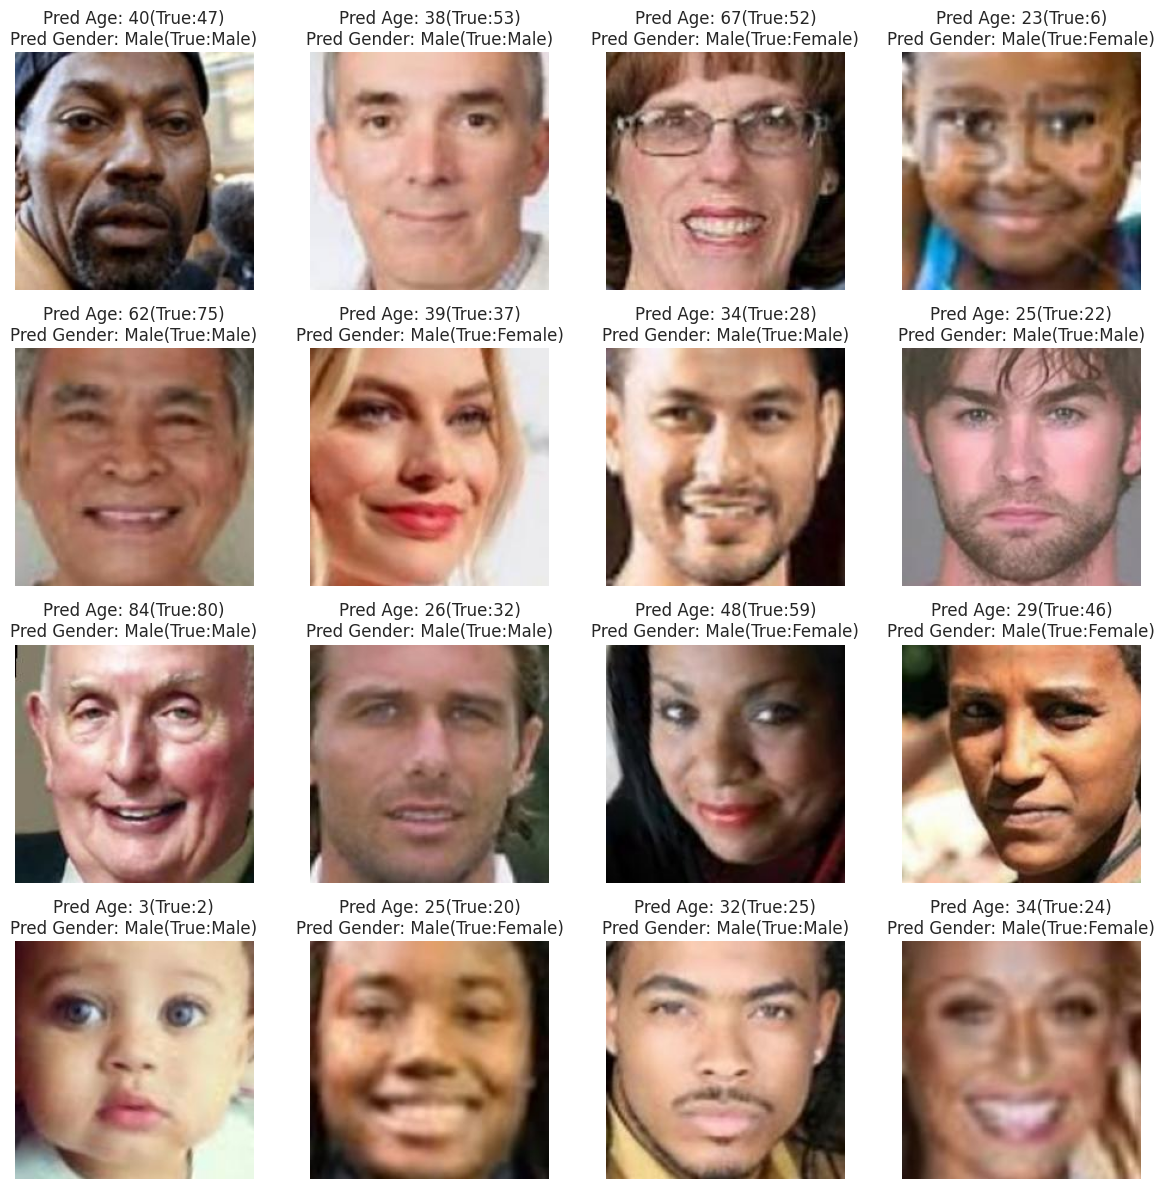

In [ ]:
visualize_results(df_test)

In [ ]:
# تقييم النموذج على بيانات الاختبار
test_loss, test_gender_loss, test_age_loss = model.evaluate(
    test_img_arr, [test_gender_arr, test_age_arr], verbose=1
)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Gender Loss: {test_gender_loss:.4f}")
print(f"Test Age Loss: {test_age_loss:.4f}")


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - dense_1_accuracy: 0.9026 - dense_3_mae: 6.7061 - loss: 7.3857
Test Loss: 7.4596
Test Gender Loss: 0.8990
Test Age Loss: 6.7668


Classification Report for Gender:
              precision    recall  f1-score   support

        Male       0.92      0.89      0.90      2488
      Female       0.88      0.91      0.90      2254

    accuracy                           0.90      4742
   macro avg       0.90      0.90      0.90      4742
weighted avg       0.90      0.90      0.90      4742



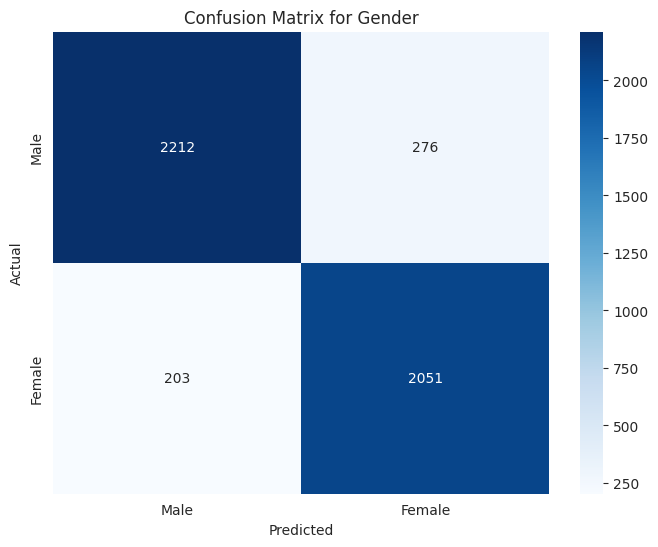

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# تحويل القيم التنبؤية للنوع إلى 0 أو 1
true_gender = df_test["gender"].values
pred_gender = (np.array(preds[0]) > 0.5).astype(int)

# حساب confusion matrix
conf_matrix = confusion_matrix(true_gender, pred_gender)
#print("Confusion Matrix for Gender:")
#print(conf_matrix)

# حساب classification report
class_report = classification_report(true_gender, pred_gender, target_names=["Male", "Female"])
print("Classification Report for Gender:")
print(class_report)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gender")
plt.show()


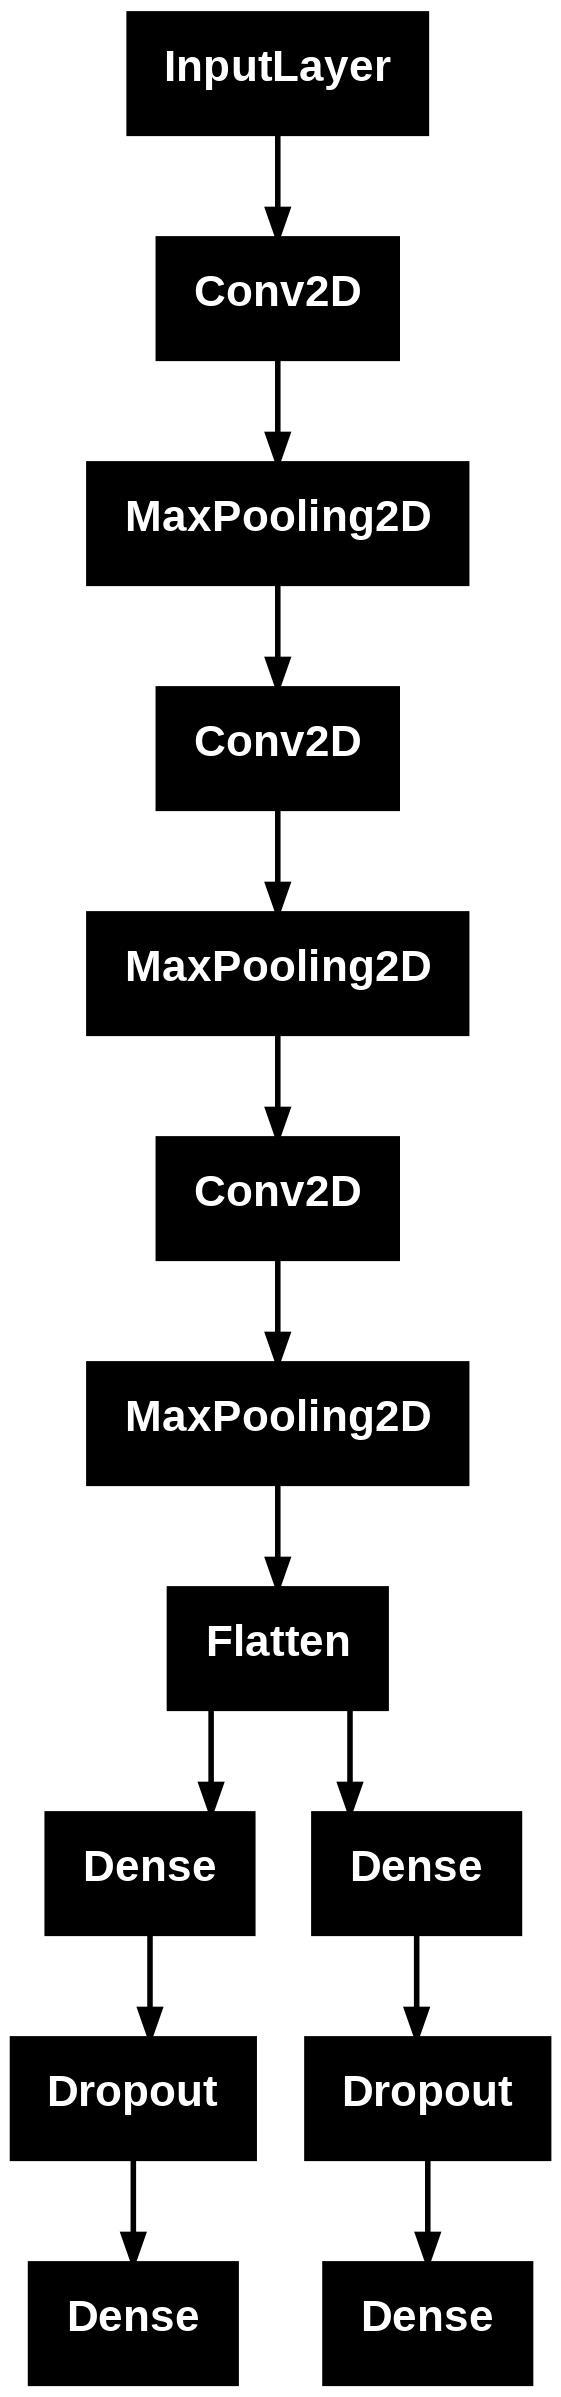

In [ ]:
plot_model(model)